In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

D = pd.read_csv('D:\Desktop\Project\FlightSalesClean.csv')

print('loading Dataset Compelete!')

Done loading Dataset!


In [2]:
#this function is to show values on chart's bars

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:

#we make this list for later, to sort the charts by months name(default chart sort is alphabetically)
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [4]:
#convert month number to month name for a better look on pie chart
D['month'] = D['month'].apply(lambda x: calendar.month_abbr[x])

#how much money has been spent for flight ticket each month in total
sum_month_prc = D.groupby('month')['price'].sum()  
sum_month_prc = sum_month_prc.sort_values(ascending=False)  #sort months based on their spenditure


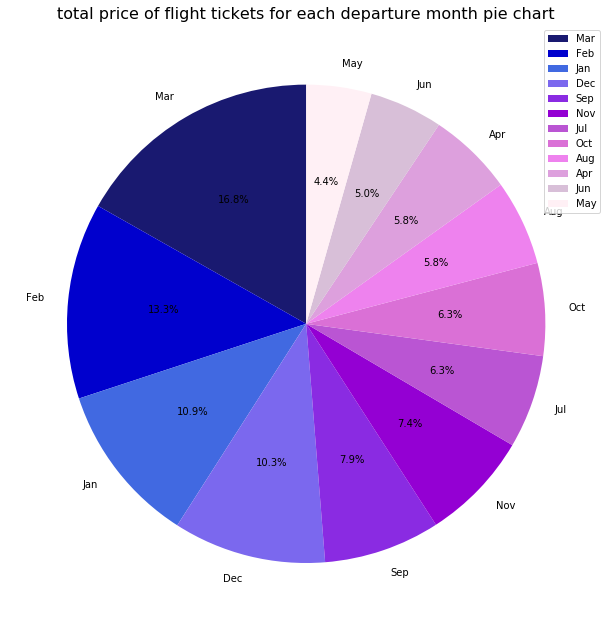

In [5]:
#plot all months pie chart
colors = ['midnightblue','mediumblue','royalblue','mediumslateblue','blueviolet','darkviolet','mediumorchid' ,'orchid','violet', 'plum','thistle','lavenderblush']
sum_month_prc.plot.pie(figsize = (11,11) , startangle=90 , autopct='%1.1f%%' , colors=colors)
plt.ylabel('')
plt.legend(loc="best")
plt.title( "total price of flight tickets for each departure month pie chart", horizontalalignment='center', fontsize=16 )
plt.show()


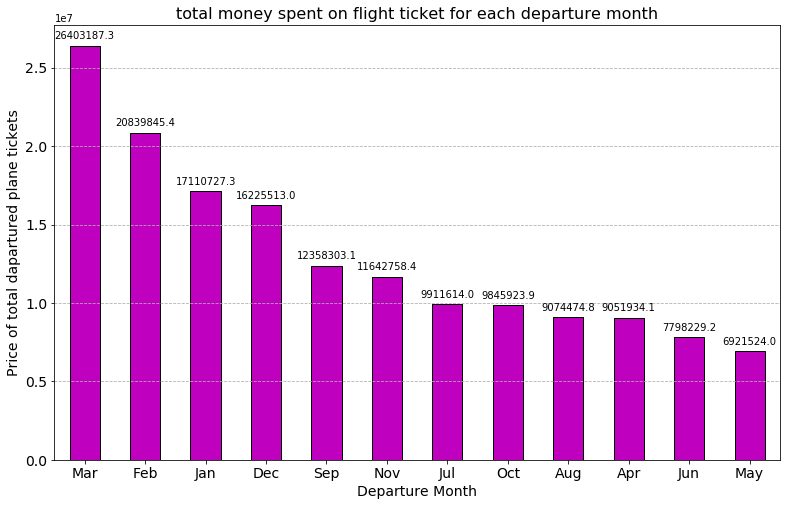

top 3 departure month’s total price of flights in descending order:
   month         price
0   Mar  2.640319e+07
1   Feb  2.083985e+07
2   Jan  1.711073e+07


In [8]:
#plot all months bar chart

month_price_plot = sum_month_prc.plot.bar(rot=0 ,edgecolor="black", color = 'm' , fontsize = 14 , figsize = (13,8))
plt.figtext(0.5, 0.01, "", wrap=True, horizontalalignment='center', fontsize=14)
plt.title('total money spent on flight ticket for each departure month' , fontsize = 16)
plt.ylabel('Price of total dapartured plane tickets' , fontsize = 14)
plt.xlabel('Departure Month' , fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
add_value_labels(month_price_plot)
plt.show()

#for printing the result in good look:
TMP_printable_table = sum_month_prc.to_frame()[:3].reset_index()
print('top 3 departure month’s total price of flights in descending order:\n',TMP_printable_table)

